## V1534 Sco Brightness Temperature Plot

In [1]:
#imports

import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:

data_novas = (

["V392 Per",	3.40,    	0.78,			0.33,			"Gaia DR3 Parallax",			"2500 +/- 200",		"5500 +/- 300"],
["V1535 Sco",	7.79,	  	0.75,	        	0.69,			"Gaia DR3 Parallax",],
["V5589 Sgr",	8.04,		1.78,			1.35,			"Extinctions / Mass Model",					"4500 +/- 500"],
["RS Oph",		2.71,		0.2,			0.13,			"Gaia DR3 Parallax",],			
["V1534 Sco",	9.11,		2.14,			1.55,			"Extinctions/Colors/Mass Model",],
)

df_novas = pd.DataFrame(data_novas, columns = ['Nova', 'Distance', 'Distance Error (+)', 
                                               'Distance Error (-)', 'Distance Source', "V1(km/s)",		"V2(km/s)"])

df_novas

,Nova,Distance,Distance Error (+),Distance Error (-),Distance Source,V1(km/s),V2(km/s)
0,V392 Per,3.40,0.78,0.33,Gaia DR3 Parallax,2500 +/- 200,5500 +/- 300
1,V1535 Sco,7.79,0.75,0.69,Gaia DR3 Parallax,None,None
2,V5589 Sgr,8.04,1.78,1.35,Extinctions / Mass Model,4500 +/- 500,None
3,RS Oph,2.71,0.20,0.13,Gaia DR3 Parallax,None,None
4,V1534 Sco,9.11,2.14,1.55,Extinctions/Colors/Mass Model,None,None


In [3]:
#all the different freqs

f1_26 = ([56757.5,	1.26,	14.9,	0.0489],#13B-057	Justin	4/10/2014	A	JMFIT, dowidth -1)
         [56768.4,	1.26,	10.998,	0.056],#13B-057	Justin	4/21/2014	A	JMFIT, dowidth -1
         [56774.4,	1.26,	9.64,	0.0464],#13B-057	Justin	4/27/2014	A	JMFIT, dowidth -1
         [56788.3,	1.26,	7.29,	0.0473],#13B-057	Justin	5/11/2014	A	JMFIT, dowidth -1
         [56821.3,	1.26,	2.75,	0.0824],#13B-057	Justin	6/13/2014	A->D (move)	JMFIT, dowidth -1
         [56841.2,	1.26,	3.53,	0.0426],#13B-057	Justin	7/3/2014	D	JMFIT, dowidth -1
         [56881,	1.26,	1.24,	0.491],#13B-057	Justin	8/12/2014	D	JMFIT, dowidth -1
         [56908.1,	1.26,	1.19,	0.313],#13B-057	Justin	9/8/2014	D	JMFIT had problems this time, used peak flux and off-source rms from difmap
         [56950.9,	1.26,	0.88,	0.176],#13B-057	Justin	10/20/2014	C	JMFIT, dowidth -1
         [56969.9,	1.26,	0.461,	0.178],#13B-057	Justin	11/8/2014	C	NON-DETECTION, very noisy, flux and rms from Difmap
         [56997.8,	1.35,	0.398,	0.156],#13B-057	Justin	12/6/2014	C	NON-DETECTION, flux and rms from difmap, very messy, cut out short baselines to get rid of the worst of it; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
         [57039.7,	1.26,	0.272,	0.136],#13B-057	Justin	1/17/2015	CnB	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
         [57082.6,	1.26,	0.192,	0.116],#13B-057	Justin	3/1/2015	B	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
         [57136.4,	1.26,	0.115,	0.0965],#13B-057	Justin	4/24/2015	B	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
         
        )
f1_73 = ([56757.5,	1.73,	15.3,	0.0413],#	 	 	 	JMFIT, dowidth -1
         [56768.4,	1.83,	9.67,	0.0416],#	 	 	 	JMFIT, dowidth -1
         [56774.4,	1.83,	8.07,	0.0367],#	 	 	 	JMFIT, dowidth -1
         [56788.3,	1.73,	6,	0.0447],#	 	 	JMFIT, dowidth -1
         [56821.3,	1.73,	2.97,	0.0738],#	 	 	 	JMFIT, dowidth -1
         [56841.2,	1.73,	3.05,	0.0129],#	 	 	 	JMFIT, dowidth -1
         [56881,	1.73,	1.69,	0.143],#	 	 	 	JMFIT, dowidth -1
         [56908.1,	1.73,	1.07,	0.134],#	 	 	 	JMFIT, dowidth -1
         [56950.9,	1.73,	0.352,	0.15],#	 	 	 	JMFIT, dowidth -1
         [56969.9,	1.73,	0.607,	0.149],#	 	 	 	JMFIT, dowidth -1
         [56997.8,	1.74,	0.191,	0.107],#	 	 	 	NON-DETECTION, flux and rms from difmap, very messy
         [57039.7,	1.73,	0.153,	0.0705],#	 	 	 	non-detection, flux and rms from difmap
         [57082.6,	1.8,	0.228,	0.045],#	 	 	JMFIT, dowidth -1
         [57136.4,	1.8,	0.0672,	0.0514],#	 	 	non-detection, flux and rms from difmap
        )
f4_55 = ([56757.5,	4.55,	13.3,	0.0093],#	 	 	 	JMFIT, dowidth -1
         [56768.4,	4.55,	7.69,	0.0136],#	 	 	 	JMFIT, dowidth -1
         [56774.4,	4.55,	6.01,	0.0146],#	 	 	 	JMFIT, dowidth -1
         [56788.3,	4.55,	3.58,	0.0246],#	 	 	 	JMFIT, dowidth -1
         [56821.3,	4.55,	1.11,	0.0593],#	 	 	 	JMFIT, dowidth -1
         [56841.2,	4.55,	1.67,	0.0333],#	 	 	 	JMFIT, dowidth -1
         [56881,	4.55,	0.792,	0.0322],#	 	 	 	JMFIT, dowidth -1
         [56908.1,	4.55,	0.674,	0.0344],#	 	 	 	JMFIT, dowidth -1
         [56950.9,	4.55,	0.137,	0.0202],#	 	 	 	JMFIT, dowidth -1
         [56969.9,	4.55,	0.273,	0.0186],#	 	 	 	JMFIT, dowidth -1
         [56997.8,	4.55,	0.184,	0.026],#	 	 	 	JMFIT, dowidth -1
         [57039.7,	4.55,	0.11,	0.0139],#	 	 	 	JMFIT, dowidth -1
         [57082.6,	4.55,	0.0528,	0.0157],#	 	 	 	JMFIT, dowidth -1
         [57136.4,	4.55,	0.0609,	0.0127],#	 	 	 	JMFIT (dowidth -1), just barely able to find nova
         [57360.7,	5,	0.0211,	0.0335],#	 	 	 	 	non-detection, flux and rms from difmap
        )
f7_38 = ([56757.5,	7.38,	10.5,	0.0061],#	 	 	 	JMFIT, dowidth -1
         [56768.4,	7.38,	6.16,	0.0101],#	 	 	 	JMFIT, dowidth -1
         [56774.4,	7.38,	3.79,	0.0257],#	 	 	 	JMFIT, dowidth -1
         [56788.3,	7.38,	1.77,	0.0223],#	 	 	 	JMFIT, dowidth -1
         [56821.3,	7.38,	0.571,	0.047],#	 	 	 	JMFIT, dowidth -1
         [56841.2,	7.38,	1.22,	0.0265],#	 	 	 	JMFIT, dowidth -1
         [56881,	7.38,	0.504,	0.033],#	 	 	 	JMFIT, dowidth -1
         [56908.1,	7.38,	0.403,	0.0155],#	 	 	 	JMFIT, dowidth -1
         [56950.9,	7.38,	0.0398,	0.0129],#	 	 	 	JMFIT, dowidth -1, just barely a detection (I only found it because I knew where to look)
         [56969.9,	7.38,	0.198,	0.0109],#,	 	 	 	JMFIT, dowidth -1
         [56997.8,	7.38,	0.0982,	0.013],#	 	 	 	JMFIT, dowidth -1
         [57039.7,	7.38,	0.0714,	0.0102],#	 	 	 	JMFIT, dowidth -1
         [57082.6,	7.38,	0.0586,	0.0116],#	 	 	 	JMFIT, dowidth -1
         [57136.4,	7.38,	0.0676,	0.0102],#	 	 	 	JMFIT (dowidth -1)
         [57360.7,	7,	0.0352,	0.0265],# 	 	 	 	non-detection, flux and rms from difmap
        )
f13_5 = ([56759.5,	13.5,	6.44,	0.0183],#13B-057	Justin	4/12/2014	A	JMFIT, dowidth -1
         [56768.4,	13.5,	4.59,	0.0132],#13B-057	Justin	4/21/2014	A	JMFIT, dowidth -1
         [56776.4,	13.5,	3.51,	0.0121],#13B-057	Justin	4/29/2014	A	JMFIT, dowidth -1
         [56790.4,	13.5,	2.4,	0.0117],#13B-057	Justin	5/13/2014	A	JMFIT, dowidth -1
         [56827.2,	13.5,	1.197,	0.0465],#13B-057	Justin	6/19/2014	A->D (move)	had to cut out long baselines, JMFIT, dowidth -1
         [56851.2,	13.5,	0.772,	0.0182],#13B-057	Justin	7/13/2014	D	JMFIT, dowidth -1
         [56936.6,	13.5,	0.257,	0.0138],#13B-057	Justin	10/6/2014	DnC -> C	JMFIT, dowidth -1
         [56952.9,	13.5,	0.136,	0.041],#13B-057	Justin	10/22/2014	C	JMFIT, dowidth -1
         [56969.8,	13.5,	0.135,	0.0136],#13B-057	Justin	11/8/2014	C	JMFIT, dowidth -1
         [57003.7,	13.5,	0.1,	0.0149],#13B-057	Justin	12/12/2014	C	JMFIT, dowidth -1, NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
         [57039.6,	13.5,	0.128,	0.0122],#13B-057	Justin	1/17/2015	CnB	JMFIT, dowidth -1, NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
         [57085.5,	13.5,	0.0451,	0.0142],#13B-057	Justin	3/4/2015	B	JMFIT, dowidth -1, NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
         [57140.4,	13.5,	0.011,	0.0147],#13B-057	Justin	4/28/2015	B	non-detection, flux and rms from difmap; NOTE: observed in same block as Sgr 2014, calibrated with CASA pipeline
         [57360.7,	13.5,	0.00819,	0.018],#	 	 	 	 	non-detection, flux and rms from difmap
        )
f17_5 = ([56759.5,	17.5,	5.19,	0.0241],#	 	 	 	JMFIT, dowidth -1
         [56768.4,	17.5,	3.98,	0.0178],#	 	 	 	JMFIT, dowidth -1
         [56776.4,	17.5,	3.02,	0.0159],#	 	 	 	JMFIT, dowidth -1
         [56790.4,	17.5,	2.05,	0.015],# 	 	 	 	JMFIT, dowidth -1
         [56827.2,	17.5,	1.15,	0.0541],#	 	 	 	had to cut out long baselines, JMFIT, dowidth -1
         [56851.2,	17.4,	0.646,	0.0221],#	 	 	 	JMFIT, dowidth -1
         [56936.6,	17.5,	0.2213,	0.0167],#	 	 	 	JMFIT, dowidth -1
         [56952.9,	17.5,	0.0645,	0.0163],#	 	 	 	JMFIT, dowidth -1 NOTE: reported flux maybe too low, uniform weighting has ~0.18 mJy, natural is 0.06
         [56969.8,	17.5,	0.158,	0.0174],#	 	 	 	JMFIT, dowidth -1
         [57003.7,	17.5,	0.109,	0.0172],# 	 	 	 	JMFIT, dowidth -1
         [57039.6,	17.4,	0.0693,	0.0163],#	 	 	 	JMFIT, dowidth -1
         [57085.5,	17.4,	0.0442,	0.0175],#	 	 	 	JMFIT, dowidth -1
         [57140.4,	17.4,	0.0266,	0.0181],#	 	 	 	non-detection, flux and rms from difmap
         [57360.7,	16.5,	0.0276,	0.0204],#	 	 	 	 	non-detection, flux and rms from difmap
        )
f29_5 = ([56747.5,	29.5,	6.42,	0.0217],	#13B-057	Justin	3/31/2014	A	3-bit obs., JMFIT, dowidth -1)
         [56759.5,	29.5,	2.38,	0.0207],#	 	 	 	3-bit obs., JMFIT, dowidth -1
         [56768.4,	29.5,	2.05,	0.029],	#	 	 	 	3-bit obs., missing IF 64, JMFIT, dowidth -1
         [56776.4,	29.5,	1.93,	0.0227],#	 	 	 	3-bit obs., JMFIT, dowidth -1
         [56790.4,	29.5,	1.01,	0.0203],#	 	 	 	3-bit obs. JMFIT, dowidth -1
         [56827.2,	29.5,	0.433,	0.0625],#	 	 	 	3-bit obs., had to cut out long baselines, JMFIT, dowidth -1
         [56851.2,	28.2,	0.521,	0.118],#	 	 	 	JMFIT, dowidth -1, maybe decorrelated, very noisy
         [56936.6,	28.2,	0.322,	0.054],#	 	 	 	JMFIT, dowidth -1, NOTE: I think JMFIT gets too high a flux for this one, probably more like0.22 mJy
         [56952.9,	28.2,	0.138,	0.0396],#	 	 	 	JMFIT, dowidth -1
         [56969.8,	28.2,	-0.0562,	0.0346],#	 	 	 	NON-DETECTION, flux and rms from difmap
         [57003.7,	28.2,	0.109,	0.0401],#	 	 	 	NON-DETECTION, flux and rms from difmap
         [57039.6,	28.2,	-0.0419,	0.0413],#	 	 	 	NON-DETECTION, flux and rms from difmap
         [57085.5,	28.2,	-0.0365,	0.0424],#	 	 	 	non-detection, flux and rms from difmap
         [57140.4,	28.2,	-0.0291,	0.0449],#	 	 	 	non-detection, flux and rms from difmap
         [57360.7,	29.6,	-0.0108,	0.0578],# 	 	 	 	non-detection, flux and rms from difmap
        )
f35 = ([56747.5,	35,	5.12,	0.0281],#	 	 	3-bit obs., JMFIT, dowidth -1)
       [56759.5,	35,	1.58,	0.0226],#	 	 	3-bit obs., JMFIT, dowidth -1
       [56768.4,	35,	1.51,	0.0297],#	 	 	3-bit obs., missing IF 64, JMFIT, dowidth -1
       [56776.4,	35,	1.496,	0.0266],#	 	 	3-bit obs., JMFIT, dowidth -1
       [56790.4,	35,	0.675,	0.0236],#	 	 	3-bit obs. JMFIT, dowidth -1
       [56827.2,	35,	0.294,	0.063],#	 	 	3-bit obs., had to cut out long baselines, JMFIT, dowidth -1
       [56851.2,	36.5,	0.21,	0.152],#	 	 	 	NON-DETECTION, noisy, maybe decorrelated, flux and rms from difmap
       [56936.6,	36.5,	0.166,	0.0462],#	 	 	 	NON-DETECTION
       [56952.9,	36.5,	0.133,	0.0517],#	 	 	 	JMFIT, dowidth -1
       [56969.8,	36.5,	0.0479,	0.046],#	 	 	 	NON-DETECTION, flux and rms from difmap
       [57003.7,	36.5,	-0.0102,	0.0629],#	 	 	 	NON-DETECTION, flux and rms from difmap
       [57039.6,	36.5,	0.0144,	0.0541],#	 	 	 	NON-DETECTION, flux and rms from difmap
       [57085.5,	36.5,	-0.0088,	0.0569],#	 	 	 	non-detection, flux and rms from difmap
       [57140.4,	36.5,	0.113,	0.0622],#	 	 	 	non-detection, flux and rms from difmap
       [57360.7,	35,	0.0899,	0.0581],#	 	 	non-detection, flux and rms from difmap
      )

In [4]:
df1_26 =  pd.DataFrame(f1_26, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df1_73 =  pd.DataFrame(f1_73, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df4_55 =  pd.DataFrame(f4_55, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df7_38 =  pd.DataFrame(f7_38, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df13_5 =  pd.DataFrame(f13_5, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df17_5 =  pd.DataFrame(f17_5, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df29_5 =  pd.DataFrame(f29_5, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df35 =  pd.DataFrame(f35, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])


In [13]:
mask1 = df1_26['Flux Density (mJy)'] > 3 * np.sqrt(df1_26["Uncertainty (mJy)"]**2 + (df1_26["Flux Density (mJy)"]*0.05)**2) #don't show the non-detections
if mask1.any():
        days1_26 = df1_26['MJD'][mask1] - 56742.85
        flux1_26 = df1_26["Flux Density (mJy)"][mask1]
        flux_err1_26 = np.sqrt(df1_26["Uncertainty (mJy)"][mask1]**2 + (df1_26["Flux Density (mJy)"][mask1]*0.05)**2)

days1_73 = df1_73['MJD'] - 56742.85
flux1_73 = df1_73["Flux Density (mJy)"]
flux_err1_73 = np.sqrt(df1_73["Uncertainty (mJy)"]**2 + (df1_73["Flux Density (mJy)"]*0.05)**2)


mask2 = df4_55['Flux Density (mJy)'] > 3 * np.sqrt(df4_55["Uncertainty (mJy)"]**2 + (df4_55["Flux Density (mJy)"]*0.05)**2) #don't show the non-detections
if mask2.any():
        days4_55 = df4_55['MJD'][mask2] - 56742.85
        flux4_55 = df4_55["Flux Density (mJy)"][mask2]
        flux_err4_55 = np.sqrt(df4_55["Uncertainty (mJy)"][mask2]**2 + (df4_55["Flux Density (mJy)"][mask2]*0.05)**2)


days7_38 = df7_38['MJD'] - 56742.85
flux7_38 = df7_38["Flux Density (mJy)"]
flux_err7_38 = np.sqrt(df7_38["Uncertainty (mJy)"]**2 + (df7_38["Flux Density (mJy)"]*0.05)**2)

days13_5 = df13_5['MJD'] - 56742.85
flux13_5 = df13_5["Flux Density (mJy)"]
flux_err13_5 = np.sqrt(df13_5["Uncertainty (mJy)"]**2 + (df13_5["Flux Density (mJy)"]*0.1)**2)


mask3 = df17_5['Flux Density (mJy)'] > 3 * np.sqrt(df17_5["Uncertainty (mJy)"]**2 + (df17_5["Flux Density (mJy)"]*0.1)**2) #don't show the non-detections
if mask3.any():
        days17_5 = df17_5['MJD'][mask3] - 56742.85
        flux17_5 = df17_5["Flux Density (mJy)"][mask3]
        flux_err17_5 = np.sqrt(df17_5["Uncertainty (mJy)"][mask3]**2 + (df17_5["Flux Density (mJy)"][mask3]*0.1)**2)


mask4 = df29_5['Flux Density (mJy)'] > 3 * np.sqrt(df29_5["Uncertainty (mJy)"]**2 + (df29_5["Flux Density (mJy)"]*0.1)**2) #don't show the non-detections
if mask4.any():
        days29_5 = df29_5['MJD'][mask4] - 56742.85
        flux29_5 = df29_5["Flux Density (mJy)"][mask4]
        flux_err29_5 = np.sqrt(df29_5["Uncertainty (mJy)"][mask4]**2 + (df29_5["Flux Density (mJy)"][mask4]*0.1)**2)
    

days35 = df35['MJD'] - 56742.85
flux35 = df35["Flux Density (mJy)"]
flux_err35 = np.sqrt(df35["Uncertainty (mJy)"]**2 + (df35["Flux Density (mJy)"]*0.1)**2)

## Now the function to find brightness temp

### Using velocity = 7000 km/s from "Photometric evolution of seven recent novae and the double component characterizing the lightcurve of those emitting in γ-rays"

In [14]:
Dist = 9.11 * 3.086*10**21                #distance in cm
V_const =  7000 * 100000        #velocity in cm/s


def Con_TB(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(V_const * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Dist)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [15]:
nu0 = 1.26 #FREQUENCY 1
nu1 = 4.55 #frequency 2
nu2 = 17.5 #frequency 3
nu3 =  29.5 #freq 4


date_CAC_sec_n0 = days1_26 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))
date_CAC_sec_n1 = days4_55 * 86400    #time in seconds 
date_CAC_sec_n2 = days17_5 * 86400    #time in seconds 
date_CAC_sec_n3 = days29_5 * 86400

In [16]:
CTB_nu0, CTBError_nu0 = Con_TB(flux1_26, date_CAC_sec_n0, flux_err1_26, nu0)

CTB_nu1, CTBError_nu1 = Con_TB(flux4_55, date_CAC_sec_n1, flux_err4_55, nu1)

CTB_nu2, CTBError_nu2 = Con_TB(flux17_5, date_CAC_sec_n2, flux_err17_5, nu2)

CTB_nu3, CTBError_nu3 = Con_TB(flux29_5, date_CAC_sec_n3, flux_err29_5, nu3)

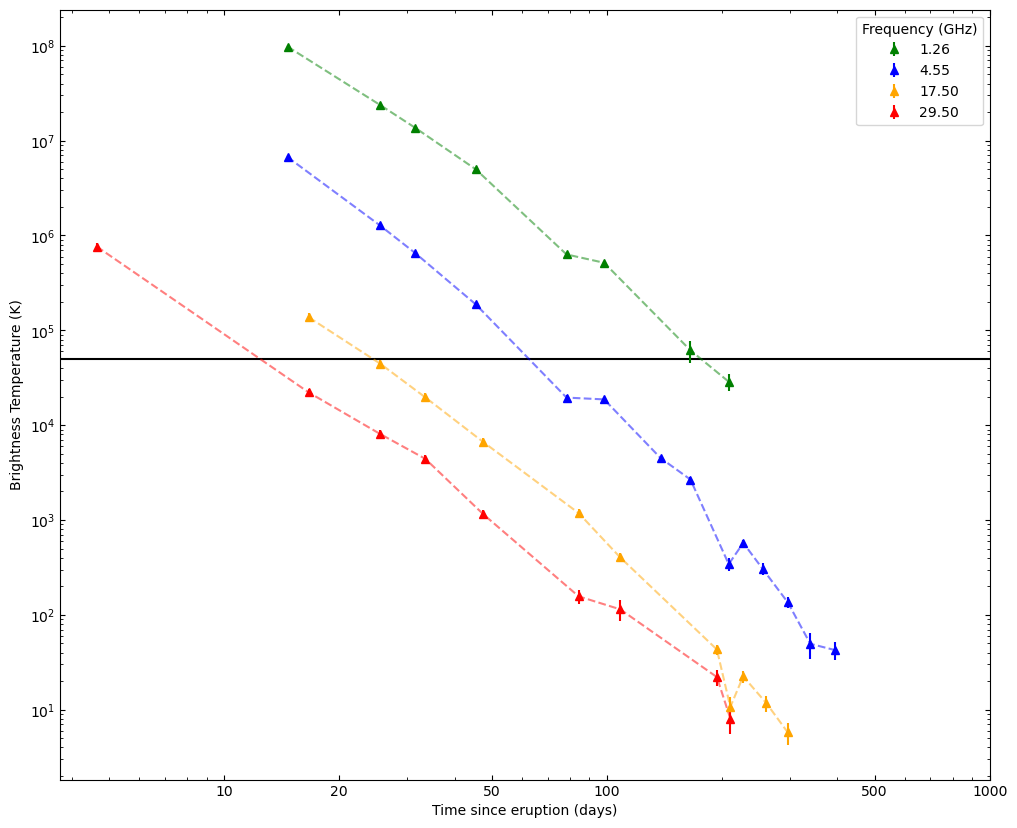

In [17]:

fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

#using a function to plot the detections only
# Store which labels have already been used
used_labels = set()

def plot(days, CTBs, CTBerrors, fluxes, errors, color, label_name):
    for day, CTB, CTBerr, flux, err in zip(days, CTBs, CTBerrors, fluxes, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            label = None  # no label for non-detections
            ax.errorbar(day, CTB, fmt=fmt, color=color, label=label)
            
        else:
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, CTB, yerr=CTBerr, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)


plot(days1_26, CTB_nu0, CTBError_nu0, flux1_26, flux_err1_26,'green', '1.26')
ax.plot(days1_26[0:27], CTB_nu0[0:27], color='green', linestyle = '--', alpha=.50)

plot(days4_55, CTB_nu1, CTBError_nu1, flux4_55, flux_err4_55,'blue', '4.55')
ax.plot(days4_55[0:30], CTB_nu1[0:30], color='blue', linestyle = '--', alpha=.50)

plot(days17_5, CTB_nu2, CTBError_nu2, flux17_5, flux_err17_5,'orange', '17.50')
ax.plot(days17_5[0:30], CTB_nu2[0:30], color='orange', linestyle = '--', alpha=.50)

plot(days29_5, CTB_nu3, CTBError_nu3, flux29_5, flux_err29_5,'red', '29.50')
ax.plot(days29_5[0:30], CTB_nu3[0:30], color='red', linestyle = '--', alpha=.50)

ax.set_xscale('log')
ax.set_xticks([10,20,50,100,500,1000], labels = ['10','20','50','100','500', '1000'])
ax.set_yscale('log')
#ax.set_yticks([.1,1,10], labels = ['0.1','1.0','10.0'])
ax.set_xlabel("Time since eruption (days)")
ax.set_ylabel("Brightness Temperature (K)")


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(title='Frequency (GHz)')
plt.show();